In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
sns.set_theme()




In [2]:
health = pd.read_csv("SYB64_325_202110_Expenditure on health.csv", encoding='latin-1')
health.head()

,Area Code,Area Name,Year,Series,Value,Footnotes,Source
0,4,Afghanistan,2005,Current health expenditure (% of GDP),9.9,NaN,"World Health Organization (WHO), Geneva, WHO G..."
1,4,Afghanistan,2010,Current health expenditure (% of GDP),8.6,NaN,"World Health Organization (WHO), Geneva, WHO G..."
2,4,Afghanistan,2016,Current health expenditure (% of GDP),11.0,NaN,"World Health Organization (WHO), Geneva, WHO G..."
3,4,Afghanistan,2017,Current health expenditure (% of GDP),11.8,NaN,"World Health Organization (WHO), Geneva, WHO G..."
4,4,Afghanistan,2018,Current health expenditure (% of GDP),9.4,NaN,"World Health Organization (WHO), Geneva, WHO G..."


In [3]:
def clean(dataset):
    codes = dataset.groupby("Area Code").count().index
    i = 0
    data1 = [pd.DataFrame()] * len(codes)
    curName = ""
    for ind in codes:
        data1[i] = dataset[dataset["Area Code"] == ind]
        curName = data1[i]["Area Name"].reset_index(drop=True)[0]
        data1[i] = data1[i].pivot_table("Value",index="Year",columns="Series",aggfunc='mean')
        data1[i]["Area Code"] = [ind] * len(data1[i])
        data1[i]["Area Name"] = [curName] * len(data1[i])
        data1[i]=data1[i].reset_index()
        i = i+1

    data_final = data1[0]
    for ind in range(len(data1)):
        if(ind!=0):
            data_final = pd.concat([data_final, data1[ind]])
    data_final = data_final.reset_index(drop=True)
    return data_final


In [4]:
data_health = clean(health)
data_health.head(20)

Series,Year,Current health expenditure (% of GDP),Domestic general government health expenditure (% of total government expenditure),Area Code,Area Name
0,2005,9.9,3.4,4,Afghanistan
1,2010,8.6,2.3,4,Afghanistan
2,2016,11.0,2.1,4,Afghanistan
3,2017,11.8,2.3,4,Afghanistan
4,2018,9.4,1.8,4,Afghanistan
5,2000,7.2,8.2,8,Albania
6,2005,6.3,9.2,8,Albania
7,2010,4.7,8.1,8,Albania
8,2016,4.9,9.6,8,Albania
9,2017,5.0,9.2,8,Albania


<AxesSubplot:xlabel='Year', ylabel='Current health expenditure (% of GDP)'>

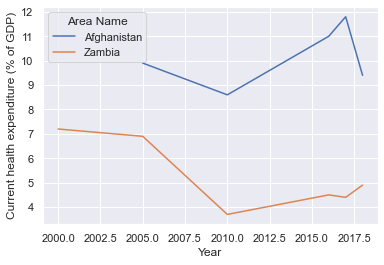

In [5]:
small_sample = data_health[(data_health["Area Name"]=="Afghanistan") | (data_health["Area Name"]=="Zambia")]

sns.lineplot(x="Year",y="Current health expenditure (% of GDP)", hue='Area Name',data=small_sample)


<AxesSubplot:xlabel='Year', ylabel='Domestic general government health expenditure (% of total government expenditure)'>

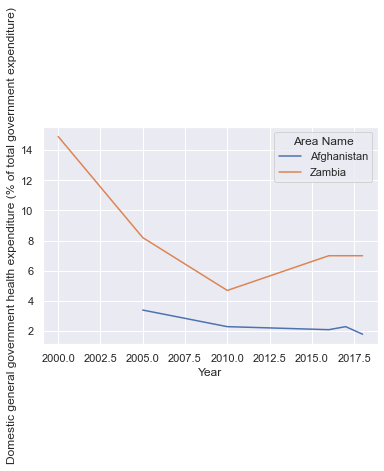

In [6]:
sns.lineplot(x="Year",y="Domestic general government health expenditure (% of total government expenditure)", hue='Area Name',data=small_sample)



In [7]:
density = pd.read_csv("SYB64_1_202110_Population, Surface Area and Density.csv", encoding='latin-1',thousands=',')
density.head()

,Area Code,Area Name,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population mid-year estimates (millions),6956.82,NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Population mid-year estimates for males (milli...,3507.70,NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,Population mid-year estimates for females (mil...,3449.12,NaN,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2010,Sex ratio (males per 100 females),101.70,NaN,"United Nations Population Division, New York, ..."
4,1,"Total, all countries or areas",2010,Population aged 0 to 14 years old (percentage),27.00,NaN,"United Nations Population Division, New York, ..."


In [8]:
data_density = clean(density)
data_density.head(20)

Series,Year,Population aged 0 to 14 years old (percentage),Population aged 60+ years old (percentage),Population density,Population mid-year estimates (millions),Population mid-year estimates for females (millions),Population mid-year estimates for males (millions),Sex ratio (males per 100 females),Surface area (thousand km2),Area Code,Area Name
0,2010,27.0,11.0,53.5,6956.82,3449.12,3507.70,101.7,NaN,1,"Total, all countries or areas"
1,2015,26.2,12.2,56.7,7379.80,3659.10,3720.70,101.7,136162.0,1,"Total, all countries or areas"
2,2019,25.6,13.2,59.3,7713.47,3824.43,3889.03,101.7,130094.0,1,"Total, all countries or areas"
3,2021,25.3,13.7,60.5,7874.97,3904.73,3970.24,101.7,NaN,1,"Total, all countries or areas"
4,2010,41.5,5.1,35.1,1039.30,521.05,518.25,99.5,NaN,2,Africa
5,2015,41.1,5.3,39.9,1182.44,592.16,590.28,99.7,30311.0,2,Africa
6,2019,40.6,5.5,44.1,1308.06,654.55,653.51,99.8,29648.0,2,Africa
7,2021,40.1,5.6,46.3,1373.49,687.07,686.42,99.9,NaN,2,Africa
8,2010,48.2,3.9,44.7,29.19,14.25,14.94,104.8,NaN,4,Afghanistan
9,2015,44.9,4.0,52.7,34.41,16.73,17.69,105.7,653.0,4,Afghanistan


<AxesSubplot:xlabel='Year', ylabel='Population aged 60+ years old (percentage)'>

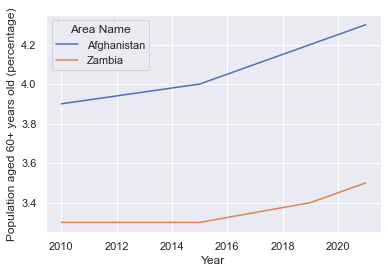

In [9]:
small_sample2 = data_density[(data_density["Area Name"]=="Afghanistan") | (data_density["Area Name"]=="Zambia")]
small_sample2
sns.lineplot(x="Year",y="Population aged 60+ years old (percentage)", hue='Area Name',data=small_sample2)